In [165]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
import pandas as pd

In [166]:
df_train = r"C:\Users\MSI GAMING\Documents\Khai phá dữ liệu\Lab05_Lê Thành Danh_3123580005\train.csv"
df_train = pd.read_csv(df_train)
df_test = r"C:\Users\MSI GAMING\Documents\Khai phá dữ liệu\Lab05_Lê Thành Danh_3123580005\test.csv"
df_test = pd.read_csv(df_test)

In [167]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Hiển thị số dòng (891), số cột (12), kiểu dữ liệu từng cột, và phát hiện giá trị thiếu ở cột Age, Cabin, Embarked.

In [168]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Ta có thể thấy số dòng (418), số cột (11), kiểu dữ liệu, và phát hiện giá trị thiếu ở cột Age, Fare, Cabin.

In [169]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [171]:
print ("Số lượng giá trị bị thiếu trong tập train:")
print (df_train.isnull().sum())

Số lượng giá trị bị thiếu trong tập train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Xác nhận số lượng thiếu: Age (177), Cabin (687), Embarked (2).

In [172]:
print ("Số lượng giá trị bị thiếu trong tập test:")
print (df_test.isnull().sum())

Số lượng giá trị bị thiếu trong tập test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Xác nhận số lượng thiếu: Age (86), Fare (1), Cabin (327).

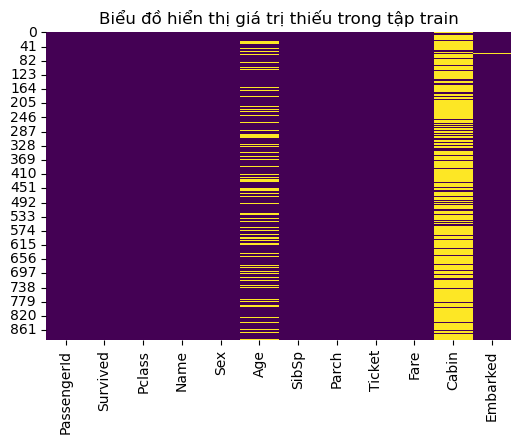

In [173]:
# Biểu đồ heatmap hiển thị missing values trong tập train
plt.figure(figsize=(6,4))
sns.heatmap(df_train.isnull(), cbar=False, cmap="viridis")
plt.title("Biểu đồ hiển thị giá trị thiếu trong tập train")
plt.show()

Biểu đồ nhiệt cho thấy cột Cabin thiếu rất nhiều, Age thiếu rải rác, Embarked thiếu rất ít.

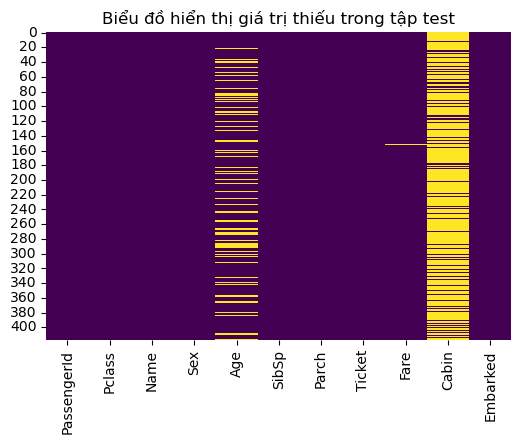

In [174]:
# Biểu đồ heatmap hiển thị missing values trong tập test
plt.figure(figsize=(6,4))
sns.heatmap(df_test.isnull(), cbar=False, cmap="viridis")
plt.title("Biểu đồ hiển thị giá trị thiếu trong tập test")
plt.show()

Cột Cabin có một dải màu vàng lớn, xác nhận tỉ lệ thiếu rất cao. Cột Age có các điểm vàng rải rác. Cột Fare chỉ có một vài điểm vàng rất nhỏ. Trực quan hóa này giúp đánh giá nhanh mức độ nghiêm trọng và tính ngẫu nhiên của dữ liệu bị thiếu.

In [175]:
df_train["Age"].fillna(df_train["Age"].median(), inplace=True)
df_test["Age"].fillna(df_test["Age"].median(), inplace=True)
df_train["Embarked"].fillna(df_train["Embarked"].mode()[0], inplace=True)
df_test["Fare"].fillna(df_test["Fare"].median(), inplace=True)
df_train.drop(columns=["Cabin"], inplace=True)
df_test.drop(columns=["Cabin"], inplace=True)



C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_22132\1382553531.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Age"].fillna(df_train["Age"].median(), inplace=True)
C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_22132\1382553531.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

- Điền Age bằng giá trị trung vị (median).

- Điền Embarked (train) bằng giá trị phổ biến nhất (mode).

- Điền Fare (test) bằng giá trị trung vị (median).

- Xóa cột Cabin vì thiếu quá nhiều.

In [176]:
print ("Số lượng giá trị bị thiếu trong tập train:")
print (df_train.isnull().sum())

Số lượng giá trị bị thiếu trong tập train:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Kiểm tra lại các giá trị bị thiếu trong tập train, kết quả là không còn giá trị bị thiếu

In [177]:
print ("Số lượng giá trị bị thiếu trong tập test:")
print (df_test.isnull().sum())

Số lượng giá trị bị thiếu trong tập test:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Kiểm tra lại các giá trị bị thiếu trong tập test, kết quả là không còn giá trị bị thiếu

C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_22132\635595346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df_train, palette="Set2")


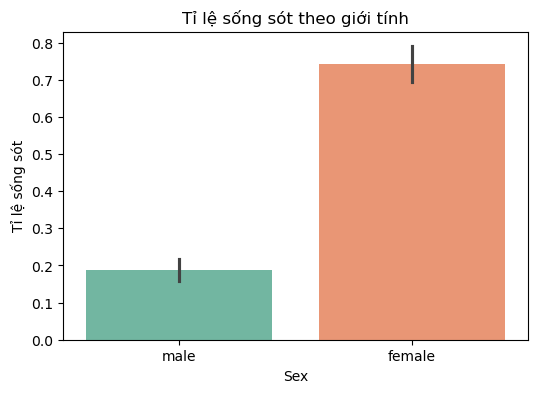

In [178]:
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=df_train, palette="Set2")
plt.title("Tỉ lệ sống sót theo giới tính")
plt.ylabel("Tỉ lệ sống sót")
plt.show()

- Biểu đồ này cho thấy một sự khác biệt rất lớn về tỉ lệ sống sót giữa nam và nữ. Phụ nữ có tỉ lệ sống sót cao hơn nhiều (khoảng 74%), trong khi nam giới có tỉ lệ sống sót rất thấp (khoảng 19%).
- Điều này khẳng định mạnh mẽ quy tắc xã hội "phụ nữ và trẻ em trước" đã được áp dụng trong quá trình sơ tán, khiến giới tính trở thành một yếu tố dự đoán khả năng sống sót cực kỳ quan trọng.

C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_22132\257531366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df_train, palette="muted")


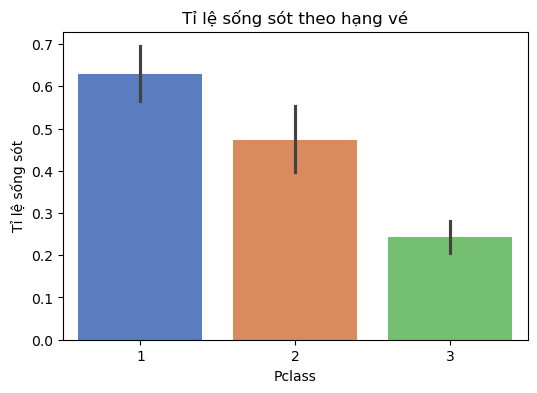

In [179]:
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=df_train, palette="muted")
plt.title("Tỉ lệ sống sót theo hạng vé")
plt.ylabel("Tỉ lệ sống sót")
plt.show()


- Biểu đồ thể hiện rõ xu hướng tỉ lệ sống sót giảm dần theo hạng vé. Hành khách hạng 1 có tỉ lệ sống sót cao nhất (~63%), tiếp đến là hạng 2 (~47%), và hạng 3 có tỉ lệ thấp nhất (~24%).
- Hạng vé phản ánh địa vị kinh tế-xã hội và có thể liên quan đến vị trí cabin trên tàu (gần boong, gần thuyền cứu sinh hơn). Hành khách hạng cao hơn rõ ràng có cơ hội sống sót tốt hơn.

C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_22132\2504502081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Embarked", y="Survived", data=df_train, palette="pastel")


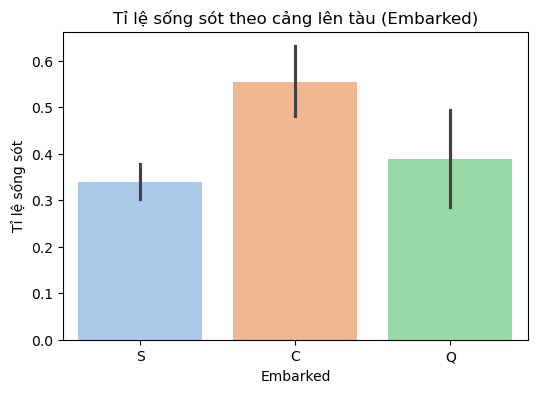

In [180]:
plt.figure(figsize=(6,4))
sns.barplot(x="Embarked", y="Survived", data=df_train, palette="pastel")
plt.title("Tỉ lệ sống sót theo cảng lên tàu (Embarked)")
plt.ylabel("Tỉ lệ sống sót")
plt.show()

- Hành khách lên tàu từ Cherbourg (C) có tỉ lệ sống sót cao hơn (~55%) so với Queenstown (Q, ~39%) và Southampton (S, ~34%).
- Mối liên hệ này có thể không trực tiếp bằng giới tính hay hạng vé. Tỉ lệ sống sót cao hơn ở cảng C có thể là do thành phần hành khách lên từ cảng này khác biệt (ví dụ: tỉ lệ hành khách hạng 1 hoặc phụ nữ cao hơn).

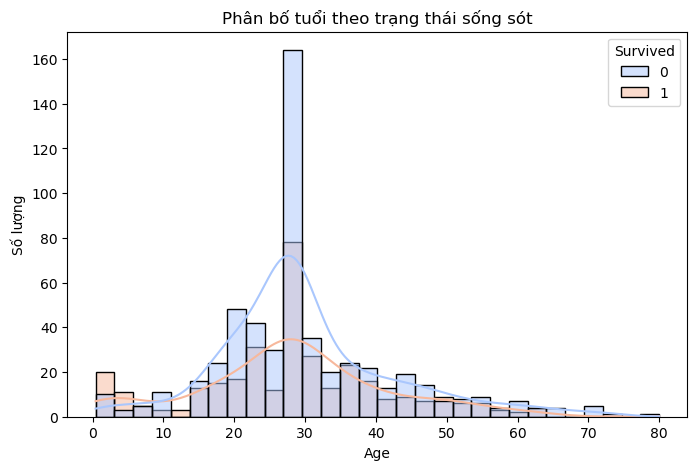

In [181]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_train, x="Age", hue="Survived", bins=30, kde=True, palette="coolwarm")
plt.title("Phân bố tuổi theo trạng thái sống sót")
plt.xlabel("Age")
plt.ylabel("Số lượng")
plt.show()

- Biểu đồ histogram cho thấy rõ ràng một đỉnh cao về số lượng người sống sót ở nhóm tuổi trẻ em (dưới 10 tuổi). Ngược lại, nhóm không sống sót có số lượng đông nhất ở độ tuổi thanh niên và trung niên (khoảng 20-40).
- Điều này củng cố giả thuyết trẻ em được ưu tiên cứu hộ hơn

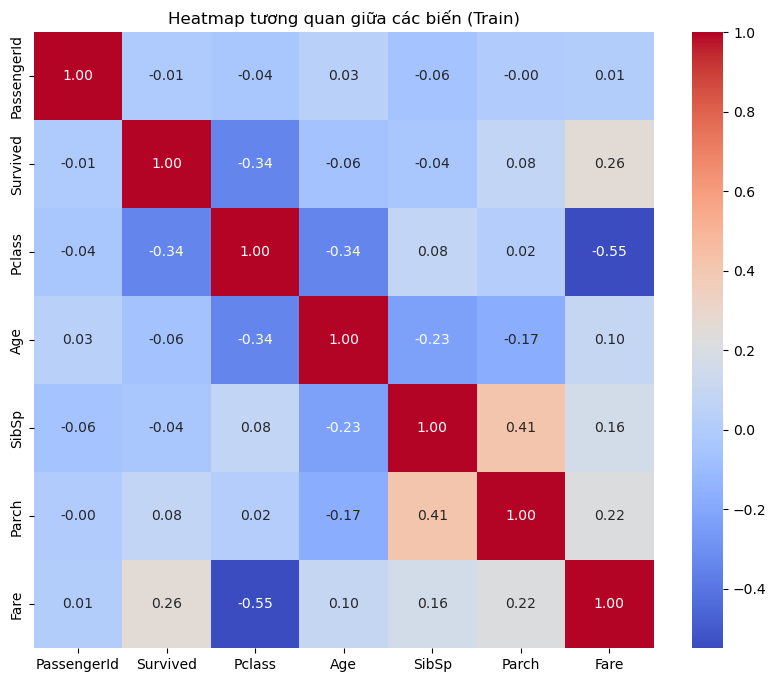

In [182]:
corr_train = df_train.corr(numeric_only=True)
corr_test = df_test.corr(numeric_only=True)

# Heatmap cho TRAIN
plt.figure(figsize=(10,8))
sns.heatmap(corr_train, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap tương quan giữa các biến (Train)")
plt.show()


- Survived (biến mục tiêu) có tương quan âm đáng kể với Pclass (-0.34). Điều này có nghĩa là khi hạng vé tăng lên (từ 1 -> 2 -> 3), khả năng sống sót giảm xuống. 
- Survived có tương quan dương vừa phải với Fare (0.26). Hành khách trả giá vé cao hơn có xu hướng sống sót cao hơn. 
- Pclass và Fare có tương quan âm mạnh (-0.55). Hạng vé càng thấp (số Pclass càng lớn) thì giá vé (Fare) càng thấp, điều này rất hợp lý.
- Age có tương quan âm với Pclass (-0.34), cho thấy hành khách ở hạng cao hơn (Pclass nhỏ) có xu hướng lớn tuổi hơn một chút.
- SibSp (số anh chị em/vợ chồng) và Parch (số bố mẹ/con cái) có tương quan dương (0.41), phản ánh việc hành khách thường đi cùng nhiều loại người thân (theo nhóm gia đình). 

Heatmap này giúp nhanh chóng xác định các mối quan hệ tuyến tính giữa các biến số. Nó làm nổi bật Pclass và Fare là các yếu tố số có liên quan rõ ràng đến khả năng sống sót. Các mối quan hệ giữa các biến độc lập như Pclass/Fare hay SibSp/Parch cũng được thể hiện rõ.

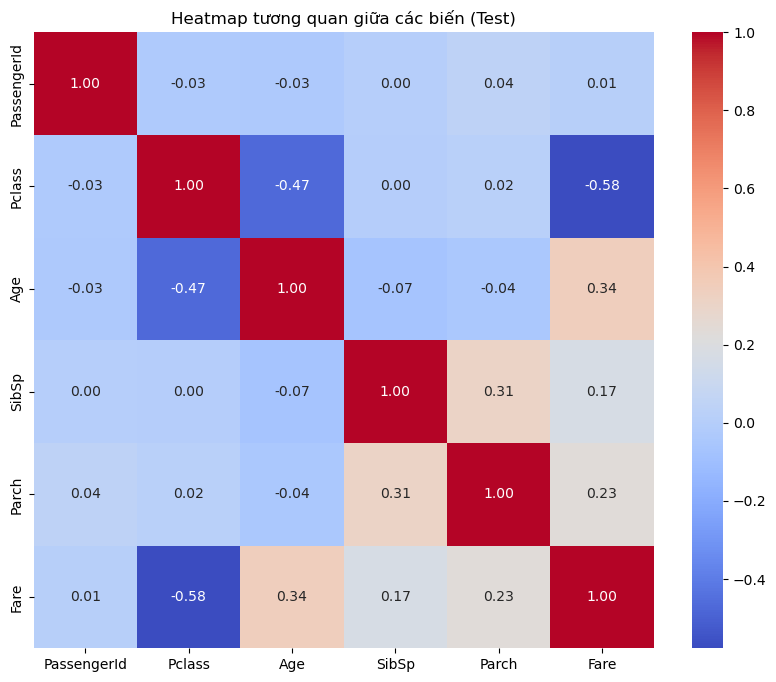

In [183]:
# Heatmap cho TEST
plt.figure(figsize=(10,8))
sns.heatmap(corr_test, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap tương quan giữa các biến (Test)")
plt.show()

- Mối tương quan âm mạnh giữa Pclass và Fare (-0.58) vẫn rất rõ ràng, tương tự như trong tập train.
- Tương quan âm giữa Age và Pclass (-0.47) có vẻ mạnh hơn một chút so với tập train.
- Tương quan dương giữa SibSp và Parch (0.31) vẫn tồn tại nhưng yếu hơn so với tập train.
- Các mối tương quan khác giữa các biến độc lập nhìn chung khá yếu và tương đối giống với tập train (ví dụ: PassengerId hầu như không tương quan với các biến khác).

Heatmap này chủ yếu dùng để kiểm tra xem cấu trúc tương quan giữa các biến độc lập có nhất quán giữa tập train và tập test hay không. Kết quả cho thấy sự tương đồng khá cao (đặc biệt là mối quan hệ Pclass/Fare), điều này là tốt, cho thấy dữ liệu trong hai tập có cấu trúc tương tự nhau, giúp mô hình học được từ tập train có thể áp dụng tốt trên tập test.